In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

### https://www.kaggle.com/code/fahadrehman07/gold-price-prediction-using-arima-model/notebook

In [2]:
df1 = pd.read_csv('data/goldstock.csv')
df2 = pd.read_csv('data/gold-dataset-sinha-khandait.csv')

In [3]:
df1.head()

,Unnamed: 0,Date,Close,Volume,Open,High,Low
0,0,2024-01-19,2029.3,166078.0,2027.4,2041.9,2022.2
1,1,2024-01-18,2021.6,167013.0,2009.1,2025.6,2007.7
2,2,2024-01-17,2006.5,245194.0,2031.7,2036.1,2004.6
3,3,2024-01-16,2030.2,277995.0,2053.4,2062.8,2027.6
4,4,2024-01-12,2051.6,250946.0,2033.2,2067.3,2033.1


In [4]:
df1.tail()

,Unnamed: 0,Date,Close,Volume,Open,High,Low
2506,2528,2014-01-28,1250.5,81426.0,1254.9,1261.9,1248.0
2507,2529,2014-01-27,1263.5,63419.0,1269.9,1280.1,1252.0
2508,2530,2014-01-24,1264.5,34998.0,1264.3,1273.2,1256.9
2509,2531,2014-01-23,1262.5,41697.0,1235.1,1267.1,1230.8
2510,2532,2014-01-22,1238.6,80262.0,1240.5,1243.5,1235.5


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2511 entries, 0 to 2510
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2511 non-null   int64  
 1   Date        2511 non-null   object 
 2   Close       2511 non-null   float64
 3   Volume      2511 non-null   float64
 4   Open        2511 non-null   float64
 5   High        2511 non-null   float64
 6   Low         2511 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 137.4+ KB


In [6]:
df1.describe()

,Unnamed: 0,Close,Volume,Open,High,Low
count,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000
mean,1260.792911,1498.726085,185970.770609,1498.725528,1508.451454,1488.869932
std,729.262879,298.824811,97600.769382,299.118187,301.262244,296.417703
min,0.000000,1049.600000,1.000000,1051.500000,1062.700000,1045.400000
25%,630.500000,1249.850000,126693.500000,1249.500000,1257.300000,1242.350000
50%,1259.000000,1332.800000,175421.000000,1334.000000,1342.400000,1326.600000
75%,1888.500000,1805.850000,234832.000000,1805.600000,1815.450000,1793.050000
max,2532.000000,2093.100000,787217.000000,2094.400000,2098.200000,2074.600000


In [7]:
df1.isnull().sum()

Unnamed: 0    0
Date          0
Close         0
Volume        0
Open          0
High          0
Low           0
dtype: int64

In [8]:
df2.head()

,Dates,URL,News,Price Direction Up,Price Direction Constant,Price Direction Down,Asset Comparision,Past Information,Future Information,Price Sentiment
0,28-01-2016,http://www.marketwatch.com/story/april-gold-do...,"april gold down 20 cents to settle at $1,116.1...",0,0,1,0,1,0,negative
1,13-09-2017,http://www.marketwatch.com/story/gold-prices-s...,gold suffers third straight daily decline,0,0,1,0,1,0,negative
2,26-07-2016,http://www.marketwatch.com/story/gold-futures-...,Gold futures edge up after two-session decline,1,0,0,0,1,0,positive
3,28-02-2018,https://www.metalsdaily.com/link/277199/dent-r...,dent research : is gold's day in the sun comin...,0,0,0,0,0,1,none
4,06-09-2017,http://www.marketwatch.com/story/gold-steadies...,"Gold snaps three-day rally as Trump, lawmakers...",0,0,1,0,1,0,negative


In [9]:
df2.tail()

,Dates,URL,News,Price Direction Up,Price Direction Constant,Price Direction Down,Asset Comparision,Past Information,Future Information,Price Sentiment
10565,07-01-2013,https://www.moneycontrol.com/news/business/mar...,gold seen falling from 3-week high this week,0,0,1,0,1,0,negative
10566,27-09-2018,https://www.metalsdaily.com/link/284468/domini...,dominic frisby : now looks like a good time to...,1,0,0,0,0,1,positive
10567,03-03-2017,https://www.thehindubusinessline.com/markets/g...,Gold heading for worst week since November on ...,0,0,1,0,1,0,negative
10568,11-06-2008,http://www.marketwatch.com/story/august-gold-u...,august gold up $7.60 at $878.80 an ounce on nymex,1,0,0,0,1,0,positive
10569,01-10-2007,http://www.marketwatch.com/story/december-gold...,december gold down $1 at $749 an ounce on nymex,0,0,1,0,1,0,negative


In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10570 entries, 0 to 10569
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Dates                     10570 non-null  object
 1   URL                       10570 non-null  object
 2   News                      10570 non-null  object
 3   Price Direction Up        10570 non-null  int64 
 4   Price Direction Constant  10570 non-null  int64 
 5   Price Direction Down      10570 non-null  int64 
 6   Asset Comparision         10570 non-null  int64 
 7   Past Information          10570 non-null  int64 
 8   Future Information        10570 non-null  int64 
 9   Price Sentiment           10570 non-null  object
dtypes: int64(6), object(4)
memory usage: 825.9+ KB


In [11]:
df2.describe()

,Price Direction Up,Price Direction Constant,Price Direction Down,Asset Comparision,Past Information,Future Information
count,10570.000000,10570.000000,10570.000000,10570.000000,10570.000000,10570.00000
mean,0.417408,0.042006,0.370104,0.189309,0.969915,0.03018
std,0.493155,0.200612,0.482855,0.391773,0.170830,0.17109
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000
75%,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [12]:
df2.isnull().sum()

Dates                       0
URL                         0
News                        0
Price Direction Up          0
Price Direction Constant    0
Price Direction Down        0
Asset Comparision           0
Past Information            0
Future Information          0
Price Sentiment             0
dtype: int64

In [13]:
df1.drop(columns=['Unnamed: 0'], inplace=True)

In [14]:
df1.head()

,Date,Close,Volume,Open,High,Low
0,2024-01-19,2029.3,166078.0,2027.4,2041.9,2022.2
1,2024-01-18,2021.6,167013.0,2009.1,2025.6,2007.7
2,2024-01-17,2006.5,245194.0,2031.7,2036.1,2004.6
3,2024-01-16,2030.2,277995.0,2053.4,2062.8,2027.6
4,2024-01-12,2051.6,250946.0,2033.2,2067.3,2033.1


In [15]:
df1['Date'] = pd.to_datetime(df1['Date'])
df1.set_index('Date', inplace=True)
print(df1.head())
print(df1.tail())
print(df1.info())
print(df1.describe())
print(df1.isnull().sum())

             Close    Volume    Open    High     Low
Date                                                
2024-01-19  2029.3  166078.0  2027.4  2041.9  2022.2
2024-01-18  2021.6  167013.0  2009.1  2025.6  2007.7
2024-01-17  2006.5  245194.0  2031.7  2036.1  2004.6
2024-01-16  2030.2  277995.0  2053.4  2062.8  2027.6
2024-01-12  2051.6  250946.0  2033.2  2067.3  2033.1
             Close   Volume    Open    High     Low
Date                                               
2014-01-28  1250.5  81426.0  1254.9  1261.9  1248.0
2014-01-27  1263.5  63419.0  1269.9  1280.1  1252.0
2014-01-24  1264.5  34998.0  1264.3  1273.2  1256.9
2014-01-23  1262.5  41697.0  1235.1  1267.1  1230.8
2014-01-22  1238.6  80262.0  1240.5  1243.5  1235.5
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2511 entries, 2024-01-19 to 2014-01-22
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2511 non-null   float64
 1   Volume  2511 non-null   f

In [16]:
type(df1.index)

pandas.core.indexes.datetimes.DatetimeIndex

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


<Figure size 1400x700 with 0 Axes>

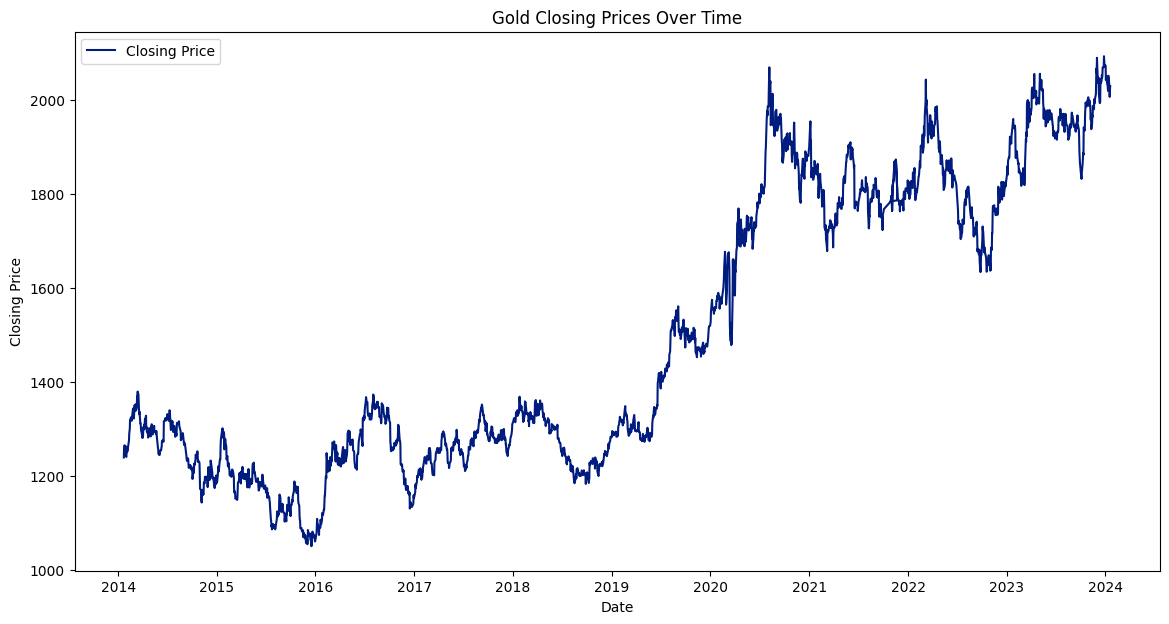

In [17]:
print(plt.style.available)

plt.style.use('seaborn-v0_8-dark-palette')
plt.figure(figsize=(14, 7))

plt.figure(figsize=(14, 7))
plt.plot(df1['Close'], label='Closing Price')
plt.title('Gold Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

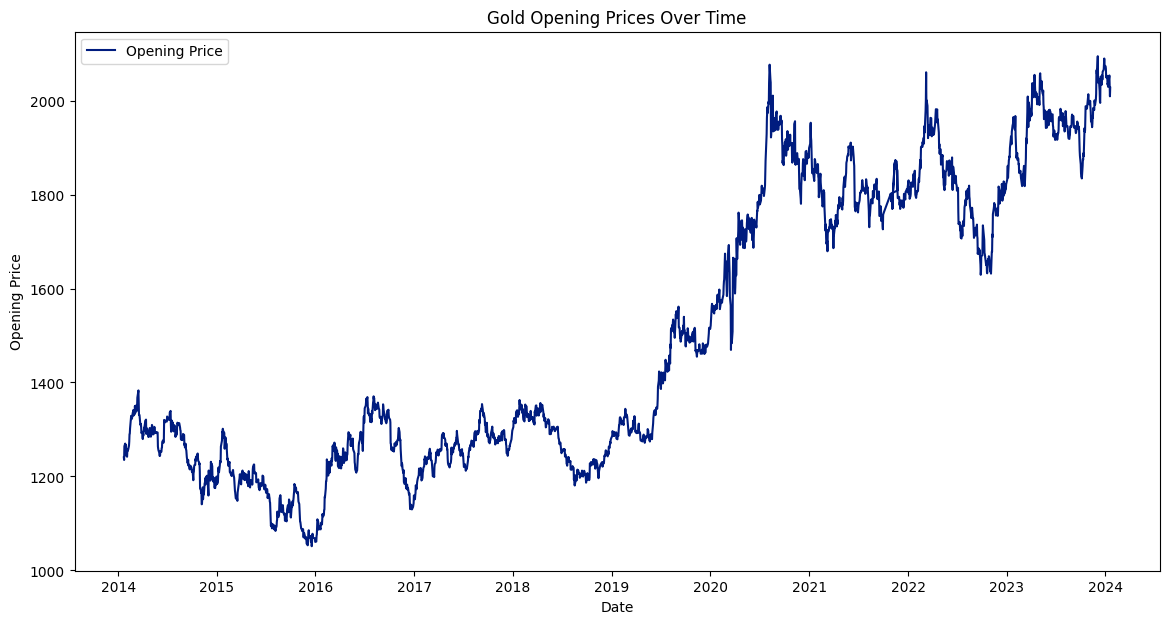

In [18]:
plt.figure(figsize=(14, 7))
plt.plot(df1['Open'], label='Opening Price')
plt.title('Gold Opening Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Opening Price')
plt.legend()
plt.show()

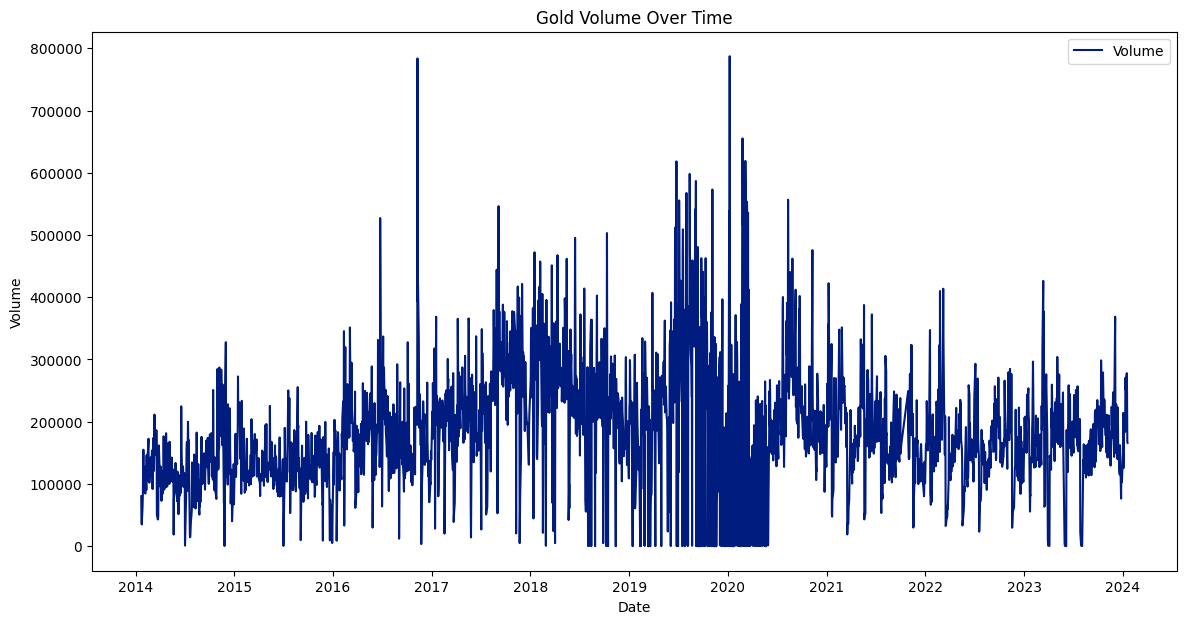

In [19]:
plt.figure(figsize=(14, 7))
plt.plot(df1['Volume'], label='Volume')
plt.title('Gold Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

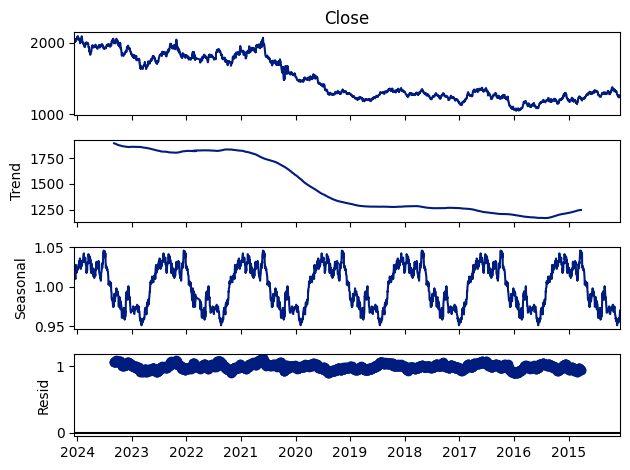

In [20]:
decomposition = seasonal_decompose(df1['Close'], model='multiplicative', period=365)
decomposition.plot()
plt.show()

In [22]:


# Split the data into train and test sets
train = df1['Close'][:int(0.8 * len(df1))]
test = df1['Close'][int(0.8 * len(df1)):]

In [23]:
model = ARIMA(train, order=(5, 1, 0))
model_fit = model.fit()

/home/uzairwayne/.cache/pypoetry/virtualenvs/pgd-machine-learning-TOyQybo7-py3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/uzairwayne/.cache/pypoetry/virtualenvs/pgd-machine-learning-TOyQybo7-py3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/uzairwayne/.cache/pypoetry/virtualenvs/pgd-machine-learning-TOyQybo7-py3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/uzairwayne/.cache/pypoetry/virtualenvs/pgd-machine-lea

In [24]:
forecast = model_fit.forecast(steps=len(test))
test.index = forecast.index  # Ensure test and forecast indices match

/home/uzairwayne/.cache/pypoetry/virtualenvs/pgd-machine-learning-TOyQybo7-py3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/uzairwayne/.cache/pypoetry/virtualenvs/pgd-machine-learning-TOyQybo7-py3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


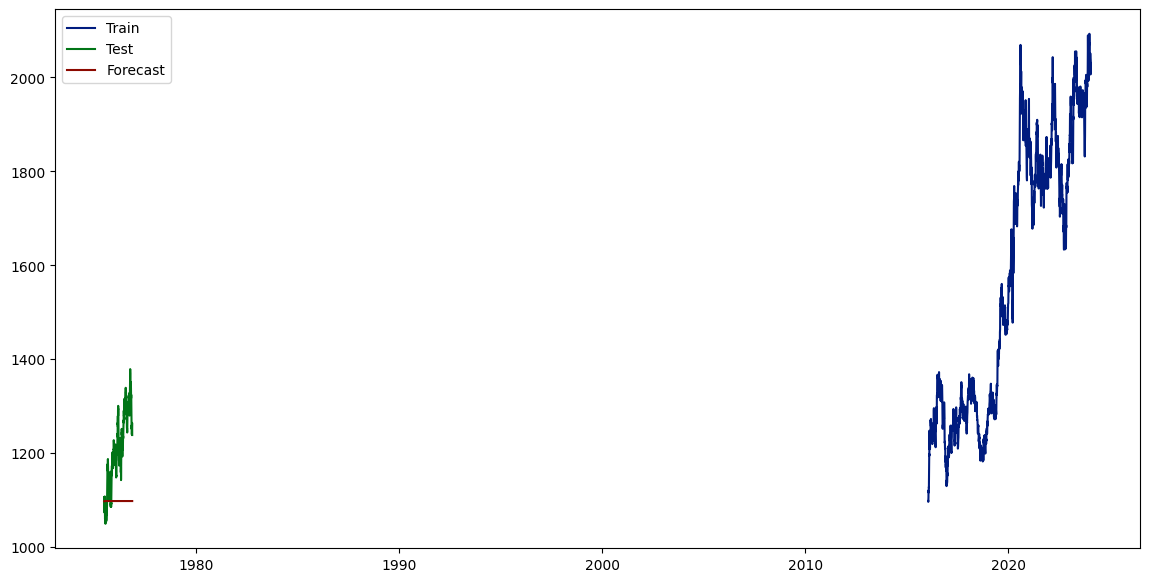

In [25]:
plt.figure(figsize=(14, 7))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Forecast')
plt.legend()
plt.show()